In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

**Reshaping Data**

In [2]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

(1797, 8, 8)

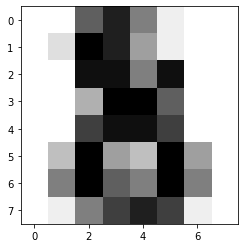

In [3]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)
digits.images.shape

For using dataset to derive inferences we want it in format (n_samples, n_features)

In [4]:
# (1797, 8, 8) -> (1797, 64)
data = digits.images.reshape((digits.images.shape[0], -1)) # -1 -> other than digits.images.shape[0] put in 1-D format
data.shape

(1797, 64)

**Estimator**

In [5]:
from sklearn import svm

In [6]:
estimator = svm.SVC()

In [7]:
estimator.fit(digits.data, digits.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
# estimator.param1 -> param1 is assigned parameters
# estimator.param_ -> param_ is estimated parameters
print(estimator.kernel, '\n', estimator.support_vectors_)

rbf 
 [[ 0.  0. 10. ... 12.  4.  0.]
 [ 0.  0.  1. ... 12.  1.  0.]
 [ 0.  0.  2. ...  3.  0.  0.]
 ...
 [ 0.  0.  5. ...  5.  0.  0.]
 [ 0.  0.  4. ...  9.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]]


K-Nearest Neighbors

In [14]:
iris = datasets.load_iris()
print(np.unique(iris.target), np.unique(iris.target_names))

[0 1 2] ['setosa' 'versicolor' 'virginica']


In [17]:
np.random.seed(0) # pseudo random number generator start with 0
indices = np.random.permutation(len(iris.data))
indices

array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52,   3, 149,  98,
         6,  68, 109,  96,  12, 102, 120, 104, 128,  46,  11, 110, 124,
        41, 148,   1, 113, 139,  42,   4, 129,  17,  38,   5,  53, 143,
       105,   0,  34,  28,  55,  75,  35,  23,  74,  31, 118,  57, 131,
        65,  32, 138,  14, 122,  19,  29, 130,  49, 136,  99,  82,  79,
       115, 145,  72,  77,  25,  81, 140, 142,  39,  58,  88,  70,  87,
        36,  21,   9, 103,  67, 117,  47])

In [19]:
x_train = iris.data[indices[:-10]]
y_train = iris.target[indices[:-10]]
x_test = iris.data[indices[-10:]]
y_test = iris.target[indices[-10:]]

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
knn.predict(x_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [24]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])